### MNIST dataset: Train five models

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

train_data=pd.read_csv("mnist_train.csv")
test_data=pd.read_csv("mnist_test.csv")

In [24]:
# Split the data into training and test sets
X_train = train_data.iloc[:, 1:].values  # All columns except the first (pixel values)
y_train = train_data.iloc[:, 0].values   # The first column is the label (digit class)

X_test = test_data.iloc[:, 1:].values  # All columns except the first (pixel values)
y_test = test_data.iloc[:, 0].values   # The first column is the label (digit class)

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train_split = scaler.fit_transform(X_train_split)  # Fit and transform training data
X_val_split = scaler.transform(X_val_split)        # Transform validation data based on training scaler
X_test = scaler.transform(X_test)                   # Transform test data based on training scaler

#### SVC WITH LINEAR KERNEL

In [26]:
svm = SVC(kernel='linear')
svm.fit(X_train_split, y_train_split)
y_val_pred = svm.predict(X_val_split)

In [27]:
print("Validation Set Performance:")
print(classification_report(y_val_split, y_val_pred))
print("Validation Accuracy Score:", accuracy_score(y_val_split, y_val_pred))


Validation Set Performance:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1175
           1       0.94      0.97      0.96      1322
           2       0.87      0.91      0.89      1174
           3       0.88      0.90      0.89      1219
           4       0.92      0.95      0.93      1176
           5       0.90      0.87      0.89      1104
           6       0.97      0.95      0.96      1177
           7       0.95      0.94      0.94      1299
           8       0.91      0.86      0.88      1160
           9       0.93      0.89      0.91      1194

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000

Validation Accuracy Score: 0.9218333333333333


Test Set Performance:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       980
           1       0.96      0.98      0.97      1135
           2       0.89      0.92      0.91      1032
           3       0.88      0.93      0.90      1010
           4       0.92      0.95      0.94       982
           5       0.91      0.87      0.89       892
           6       0.96      0.93      0.94       958
           7       0.95      0.92      0.93      1028
           8       0.90      0.87      0.88       974
           9       0.94      0.89      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000

Test Accuracy Score: 0.9248


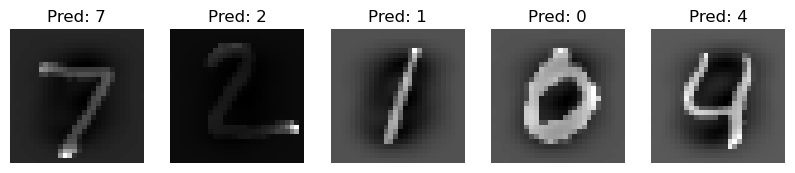

In [28]:
# Now, test the model on the test dataset
y_test_pred = svm.predict(X_test)

# Evaluate the model performance on the test set
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))

# Optional: Visualize a few test images along with their predicted labels
# Reshape a few test samples back to 28x28 for visualization purposes
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Reshape the flattened vector to 28x28
    ax.set_title(f"Pred: {y_test_pred[i]}")
    ax.axis('off')
plt.show()


#### SVC with rbf Kernel

In [ ]:
svm = SVC(kernel='rbf')
svm.fit(X_train_split, y_train_split)
y_val_pred = svm.predict(X_val_split)

print("Validation Set Performance:")
print(classification_report(y_val_split, y_val_pred))
print("Validation Accuracy Score:", accuracy_score(y_val_split, y_val_pred))


In [ ]:
# Now, test the model on the test dataset
y_test_pred = svm.predict(X_test)

# Evaluate the model performance on the test set
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))

# Optional: Visualize a few test images along with their predicted labels
# Reshape a few test samples back to 28x28 for visualization purposes
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Reshape the flattened vector to 28x28
    ax.set_title(f"Pred: {y_test_pred[i]}")
    ax.axis('off')
plt.show()


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the datasets
train_data=pd.read_csv("mnist_train.csv")
test_data=pd.read_csv("mnist_test.csv")

# Step 2: Separate features and labels
X_train_full = train_data.drop(columns=['label']) # Assuming 'label' is the target column
y_train_full = train_data['label']

X_test = test_data.drop(columns=['label']) # Assuming 'label' is the target column
y_test = test_data['label']

# Step 3: Split train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

# Step 4: Preprocessing - Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Step 5: Train models
models = {
    "SVC": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# Step 6: Evaluate models on validation set
for name, model in models.items():
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    cr=classification_report(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    print(f"{name} Validation Accuracy: {acc:.4f}")

# Step 7: Test models on test set
print("\nTest Set Results:")
for name, model in models.items():
    y_test_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_test_pred)
    print(f"{name} Test Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_test_pred))

SVC Validation Accuracy: 0.9650
Random Forest Validation Accuracy: 0.9662
Logistic Regression Validation Accuracy: 0.9123
Gradient Boosting Validation Accuracy: 0.9442

Test Set Results:
SVC Test Accuracy: 0.9645
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.96       982
           5       0.97      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.92      0.96      0.94      1028
           8       0.96      0.95      0.95       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Random Forest Test Accuracy: